# Data Cleaning and EDA with Time Series Data
This notebook holds Assignment 2.1 for Module 2 in AAI 530, Data Analytics and the Internet of Things. 

In this assignment, you will go through some basic data cleaning and exploratory analysis steps on a real IoT dataset. Much of what we'll be doing should look familiar from Module 2's lab session, but Google will be your friend on the parts that are new. 

## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

When you save your notebook as a pdf, make sure that all cell output is visible (even error messages) as this will aid your instructor in grading your work.

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [184]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#use this cell to import additional libraries or define helper functions

## Load and clean your data
The household electric consumption dataset can be downloaded as a zip file here along with a description of the data attributes:
https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption#

First we will load this data into a pandas df and do some initial discovery

In [185]:
df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")

/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_47795/43731904.py:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv("household_power_consumption.txt", delimiter = ";")


In [186]:
df_raw.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [187]:
df_raw.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


Well that's not what we want to see--why is only one column showing up?
Let's check the datatypes

In [188]:
df_raw.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

OK, so only one of our columns came in as the correct data type. We'll get to why that is later, but first let's get everything assigned correctly so that we can use our describe function.

**TODO: combine the 'Date' and 'Time' columns into a column called 'Datetime' and convert it into a datetime datatype. Heads up, the date is not in the standard format...**

**TODO: use the pd.to_numeric function to convert the rest of the columns. You'll need to decide what to do with your errors for the cells that don't convert to numbers**

In [189]:
#make a copy of the raw data so that we can go back and refer to it later
df = df_raw.copy()


In [190]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [191]:
#create your Datetime column
df['Datetime'] = df[['Date', 'Time']].apply(lambda x: ' '.join(x.values.astype(str)), axis='columns')

In [192]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0,16/12/2006 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0,16/12/2006 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0,16/12/2006 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0,16/12/2006 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0,16/12/2006 17:28:00


In [193]:
#convert all data columns to numeric types
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df['Global_reactive_power'] = pd.to_numeric(df['Global_reactive_power'], errors='coerce')
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')
df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')
df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')
df['Sub_metering_3'] = pd.to_numeric(df['Sub_metering_3'], errors='coerce')
df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_47795/2232302029.py:9: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Datetime'] = pd.to_datetime(df['Datetime'], errors='coerce')


In [194]:
df.shape

(2075259, 10)

Let's use the Datetime column to turn the Date and Time columns into date and time dtypes.

In [195]:
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [196]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

It looks like our Date and Time columns are still of type "object", but in that case that's because the pandas dtypes function doesn't recognize all data types. We can check this by printing out the first value of each column directly.

In [197]:
df.Date[0]

datetime.date(2006, 12, 16)

In [198]:
df.Time[0]

datetime.time(17, 24)

Now that we've got the data in the right datatypes, let's take a look at the describe() results

In [199]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2049280.0000,2075259
mean,1.0916,0.1237,240.8399,4.6278,1.1219,1.2985,6.4584,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3080,0.0480,238.9900,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,241.0100,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5280,0.1940,242.8900,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0573,0.1127,3.2400,4.4444,6.1530,5.8220,8.4372,NaN


Those row counts look a little funky. Let's visualize our missing data.

In [200]:
df['Sub_metering_3'].unique()

array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., nan, 12.,  1., 14.,  7., 23., 25., 26., 28.,
       27., 21., 22., 29., 24., 30., 31.])

<Axes: >

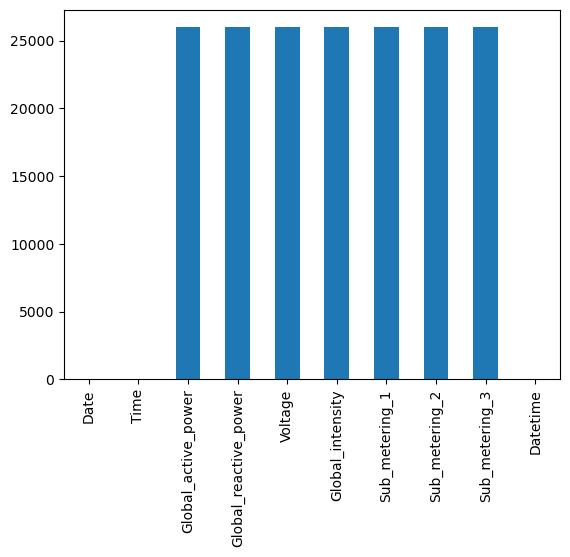

In [201]:
df.isna().sum().plot.bar()

<Axes: xlabel='Date'>

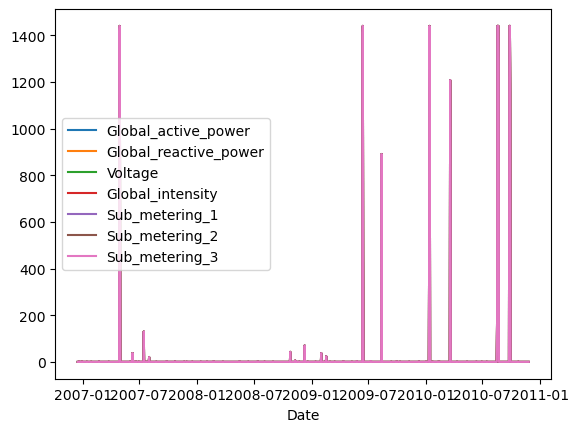

In [95]:
#https://stackoverflow.com/questions/53947196/groupby-class-and-count-missing-values-in-features
df_na = df.drop('Date', axis = 1).isna().groupby(df.Date, sort = False).sum().reset_index()
df_na.plot(x='Date', y=df_na.columns[2:-1])

**Q: What do you notice about the pattern of missing data?**

A: Almost all the columns of the dataset has more than 25000 missing values. The datatype for all the columns with missing values are float. 

**Q: What method makes the most sense to you for dealing with our missing data and why? (There isn't necessarily a single right answer here)**

A: There are 25000+ missing values. Removing them would impact the reliability of analysis. From the descriptive statistics, the Global_active_power, Global_reactive_power and Global_intensity are  positively skewed. The best way to impute them is to replace the missing values with median. 
The Voltage can be imputed by either mean or median as it appears to be normalized. The sub_metering columns takes discrete values and the best way to impute them is through mode. 

**TODO:Use your preferred method to remove or impute a value for the missing data**

In [177]:
df_imputed = df.copy()

In [202]:
#clean up missing data here
df['Global_active_power'] = df['Global_active_power'].fillna(df['Global_active_power'].median())
df['Global_reactive_power'] = df['Global_reactive_power'].fillna(df['Global_reactive_power'].median())
df['Voltage'] = df['Voltage'].fillna(df['Voltage'].mean())
df['Global_intensity'] = df['Global_intensity'].fillna(df['Global_intensity'].median())



In [203]:
df['Sub_metering_1'] = df['Sub_metering_1'].fillna(df['Sub_metering_1'].mode()[0])
df['Sub_metering_2'] = df['Sub_metering_2'].fillna(df['Sub_metering_2'].mode()[0])
df['Sub_metering_3'] = df['Sub_metering_3'].fillna(df['Sub_metering_3'].mode()[0])

In [204]:
desc = df.describe()

#force the printout not to use scientific notation
desc[desc.columns[:-1]] = desc[desc.columns[:-1]].apply(lambda x: x.apply("{0:.4f}".format))
desc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
count,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259.0000,2075259
mean,1.0855,0.1234,240.8399,4.6024,1.1079,1.2823,6.3776,2008-12-06 07:12:59.999994112
min,0.0760,0.0000,223.2000,0.2000,0.0000,0.0000,0.0000,2006-12-16 17:24:00
25%,0.3100,0.0480,239.0200,1.4000,0.0000,0.0000,0.0000,2007-12-12 00:18:30
50%,0.6020,0.1000,240.9600,2.6000,0.0000,0.0000,1.0000,2008-12-06 07:13:00
75%,1.5200,0.1920,242.8600,6.4000,0.0000,1.0000,17.0000,2009-12-01 14:07:30
max,11.1220,1.3900,254.1500,48.4000,88.0000,80.0000,31.0000,2010-11-26 21:02:00
std,1.0521,0.1120,3.2196,4.4222,6.1157,5.7873,8.4149,NaN


In [205]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,2010-11-26,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,2010-11-26,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,2010-11-26,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,2010-11-26,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [206]:
df.dtypes

Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
Datetime                 datetime64[ns]
dtype: object

## Visualizing the data

We're working with time series data, so visualizing the data over time can be helpful in identifying possible patterns or metrics that should be explored with further analysis and machine learning methods.

**TODO: Choose four of the variables in the dataset to visualize over time and explore methods covered in our lab session to make a line chart of the cleaned data. Your charts should be separated by variable to make them more readable.**

**Q: Which variables did you choose and why do you think they might be interesting to compare to each other over time? Remember that data descriptions are available at the data source link at the top of the assignment.**

A: I am choosing Global_active_power and Global_intensity. Global_active_power consumed by appliances at home and Global_intensity represents the overall current intensity drawn by the system. By comparing all these featues against time presents overall trend of consumptions like peak time, seasonal variations, low consumption period.

<Axes: xlabel='Datetime'>

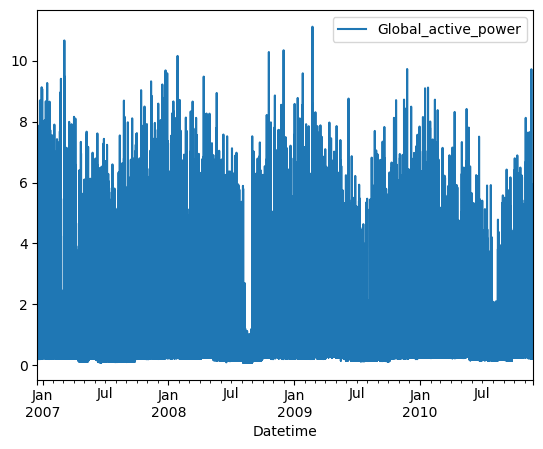

In [207]:
#build your line chart here
df.plot('Datetime', 'Global_active_power', kind='line')

array([<Axes: xlabel='Datetime'>, <Axes: xlabel='Datetime'>,
       <Axes: xlabel='Datetime'>], dtype=object)

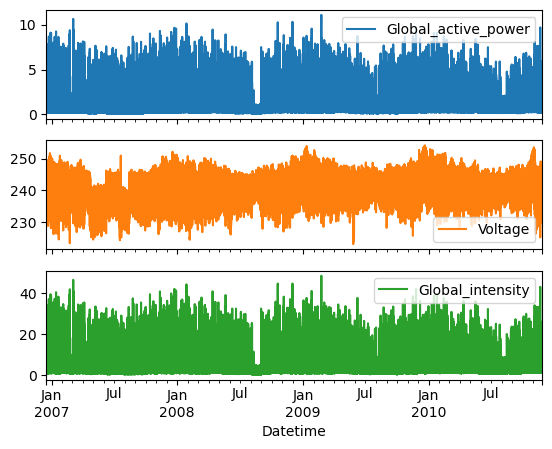

In [208]:
df.plot('Datetime', ['Global_active_power', 'Voltage', 'Global_intensity'], subplots=True)

In [209]:
df['Datetime'] = pd.to_datetime(df['Datetime'])  # Ensure it's in datetime format
df.set_index('Datetime', inplace=True)  # Set as the index

**Q: What do you notice about visualizing the raw data? Is this a useful visualization? Why or why not?**

A: The overall power consumption appears relatively consistent over the years. There are spikes that corresponds to peak times and few gaps during specific period. The consistency is shown across all three features - Global_active_power, Voltage and Global_intensity

**TODO: Compute a monthly average for the data and plot that data in the same style as above. You should have one average per month and year (so June 2007 is separate from June 2008).** 

In [256]:
#compute your monthly average here
#HINT: checkout the pd.Grouper function: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Grouper.html?highlight=grouper
monthly_avg = df.groupby(pd.Grouper(freq='M'))['Global_active_power'].mean()
monthly_avg_GI = df.groupby(pd.Grouper(freq='M'))['Global_intensity'].mean()
monthly_avg_Vol = df.groupby(pd.Grouper(freq='M'))['Voltage'].mean()




/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_47795/672336866.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.groupby(pd.Grouper(freq='M'))['Global_active_power'].mean()
/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_47795/672336866.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_GI = df.groupby(pd.Grouper(freq='M'))['Global_intensity'].mean()
/var/folders/0_/skr2d259613gs33jbnv_ytn80000gn/T/ipykernel_47795/672336866.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_Vol = df.groupby(pd.Grouper(freq='M'))['Voltage'].mean()


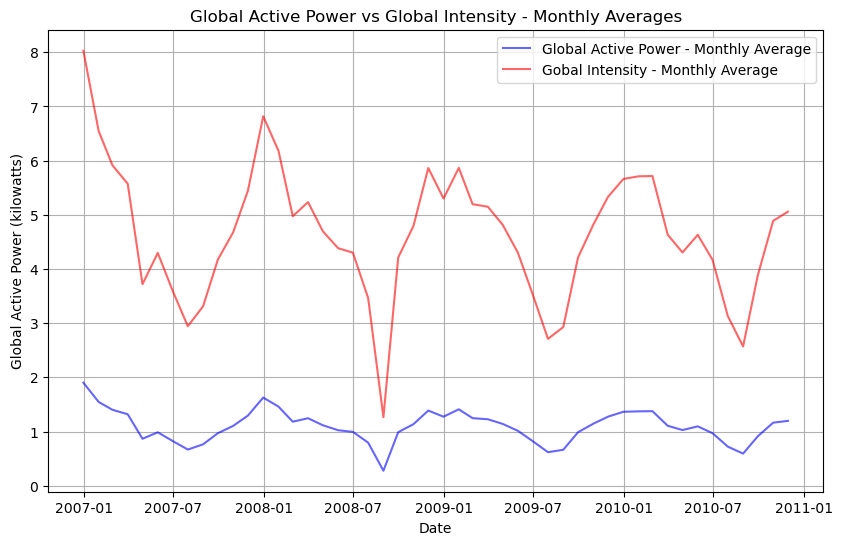

In [265]:
#build your linechart here
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg, label='Global Active Power - Monthly Average', color='blue', alpha=0.6)
plt.plot(monthly_avg_GI, label='Gobal Intensity - Monthly Average', color='Red', alpha=0.6)
plt.title('Global Active Power vs Global Intensity - Monthly Averages')
plt.xlabel('Date')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid()
plt.show()


**Q: What patterns do you see in the monthly data? Do any of the variables seem to move together?**

A: The Global Active power and Global intensity seems to be proportional. whenever there is a peak or dip in active power, the global intensity aligns with it. This shows there are no issues with power factor. if they not proportional, then there is a good probability of power factor problems or voltage instability.

**TODO: Now compute a 30-day moving average on the original data and visualize it in the same style as above. Hint: If you use the rolling() function, be sure to consider the resolution of our data.**

In [229]:
df_raw

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [236]:
#compute your moving average here
thirty_day_avg = df.groupby(pd.Grouper(freq='D'))['Global_active_power'].mean()
# 30 day moving average
thirty_day_avg_moving_avg = thirty_day_avg.rolling(window=3).mean()  



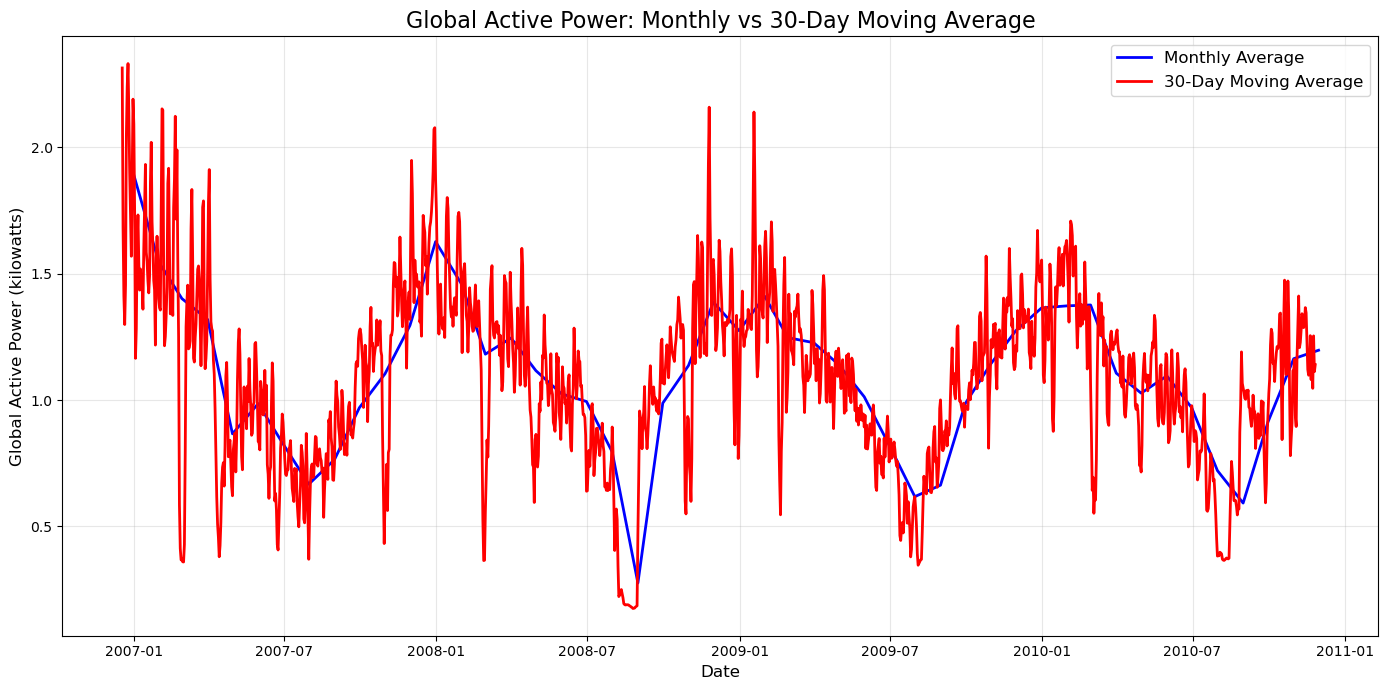

In [263]:
#build your line chart on the moving average here
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg, label='Monthly Average', color='blue', linewidth=2)
plt.plot(thirty_day_avg_moving_avg, label='30-Day Moving Average', color='red',  linewidth=2)
plt.title('Global Active Power: Monthly vs 30-Day Moving Average', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

**Q: How does the moving average compare to the monthly average? Which is a more effective way to visualize this data and why?**

A: The chart shows more granular trend in global active power with moving average. The 30 day moving average presents daily fluctuations providing more details on seasonal troughs and peaks, reflecting the consumption pattern through regular days, holidays or through a bad weather.

## Data Covariance and Correlation

Let's take a look at the Correlation Matrix for the four global power variables in the dataset.

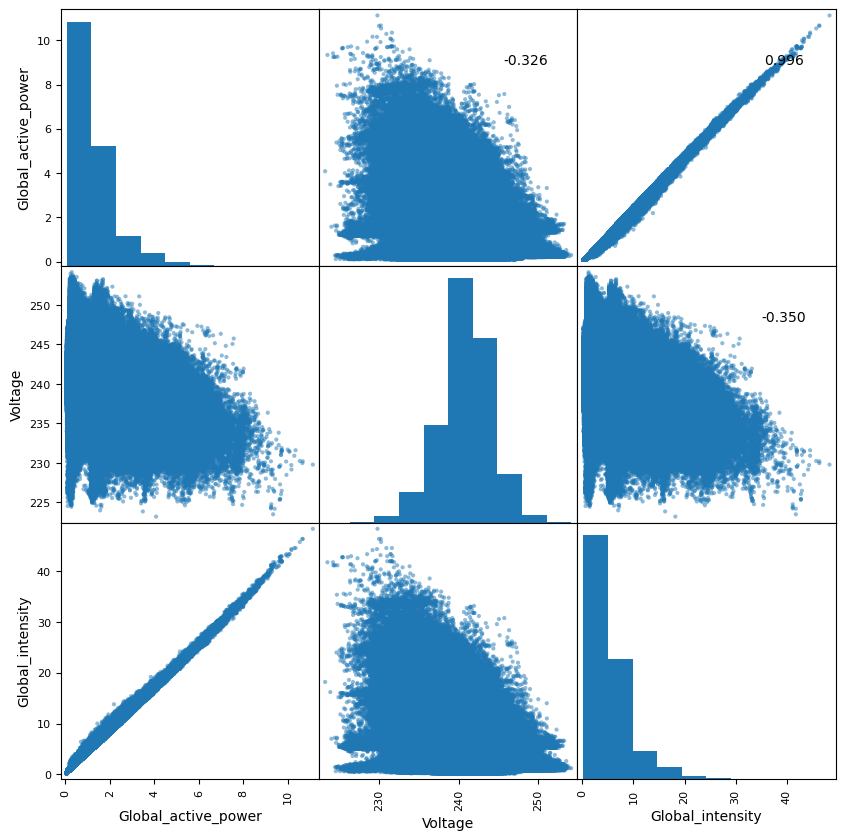

In [264]:
axes = pd.plotting.scatter_matrix(df[['Global_active_power', 'Voltage', 'Global_intensity']], alpha=0.5,figsize = [10,10])
corr = df_imputed[['Global_active_power', 'Voltage', 'Global_intensity']].corr(method = 'spearman').to_numpy() #nonlinear
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

**Q: Describe any patterns and correlations that you see in the data. What effect does this have on how we use this data in downstream tasks?**

A: The Global_active_power and Global_intensity has a strong positive correlation suggesting that higher active power correlates closely with higher intensity. while this is expected, it can also be seen that the Global power and Intensity are negatively correlated to Voltage. The electrical load and consumption might increase whenever there is an voltage drop. This is not an ideal scenario and steps are required to improve infrastructure and bring in a robust power regulations. 